In [1]:
from src.dataset import Dataset
from src.model import Model

# Create Dataset
When synthetic data is selected, it will be automatically synthesized. When experimental data -- it will be automatically downloaded.

In [2]:
ds = Dataset(data_type="experiment", n_train_samples=1, test_samples=["4", "22"])

## Create Train/Test Split
If the lag parameter is not set, then the maximum length of the transition period will be selected, according to the dataset.

In [3]:
x_train, y_train = ds.prepare_data(ds.train_indices)
x_val, y_val = ds.prepare_data(ds.test_indices) # optional, can be removed

## Visualize Train Dataset
Input voltage columns are input vector, electric power column is target.

In [4]:
ds.train_frame

,input_voltage(t-449),input_voltage(t-448),input_voltage(t-447),input_voltage(t-446),input_voltage(t-445),input_voltage(t-444),input_voltage(t-443),input_voltage(t-442),input_voltage(t-441),input_voltage(t-440),...,input_voltage(t-8),input_voltage(t-7),input_voltage(t-6),input_voltage(t-5),input_voltage(t-4),input_voltage(t-3),input_voltage(t-2),input_voltage(t-1),input_voltage(t),el_power(t)
0,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,...,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.924257
1,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,...,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.932846
2,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,...,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.925249
3,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,...,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.931935
4,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,...,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.925300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.097048
9467,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.097487
9468,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.091836
9469,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.090487


# Create Model
Data Baseline approach requires the loss function "mean_squared_error". Loss Function approach -- "custom".

In [5]:
model = Model(
    data_type=ds.data_type,
    n_train_samples=ds.n_train_samples,
    loss_function="soft_weighted_two_state", # ['mean_squared_error', 'soft_weighted_two_state']
    scaler=ds.scaler,
    steepness=ds.steepness, # provided steepness for loss function
    input_shape=(x_train.shape[1], x_train.shape[2]),
    gpu=0,
    verbose=True
)

## Train Model

In [6]:
model.train(x_train, y_train, x_val=x_val, y_val=y_val, epochs=2)

Epoch 1/2
74/74 [==============================] - 24s 241ms/step - loss: 0.1718 - root_mean_squared_error: 0.4145 - mean_squared_error: 0.1718 - loss_tgds: 6.4948e-07 - val_loss: 0.0276 - val_root_mean_squared_error: 0.1661 - val_mean_squared_error: 0.0276 - val_loss_tgds: 1.1368e-06

Epoch 00001: val_loss improved from inf to 0.02758, saving model to Results/Test/Loss_Function/type-experiment_date-2024-01-27_19-16-26/Model/best_model.h5
Restoring model weights from the end of the best epoch.


## Test and Evaluate Model

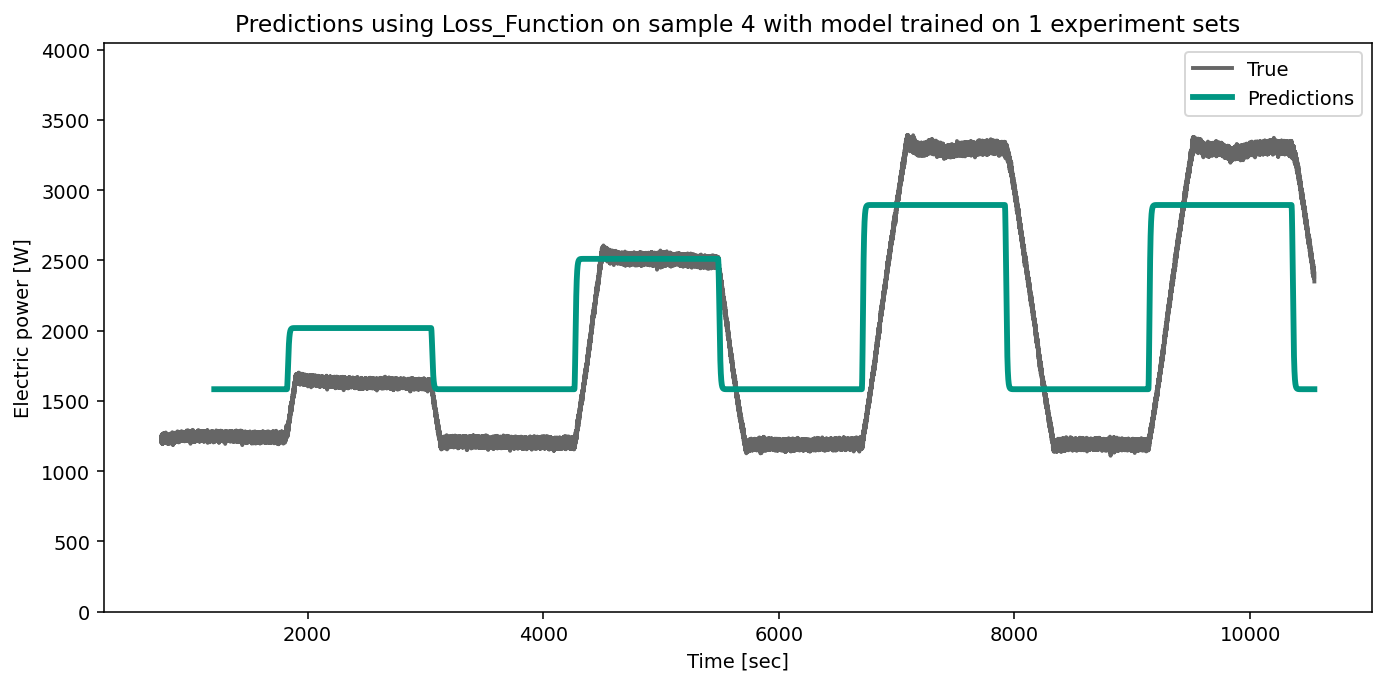

<Figure size 432x288 with 0 Axes>

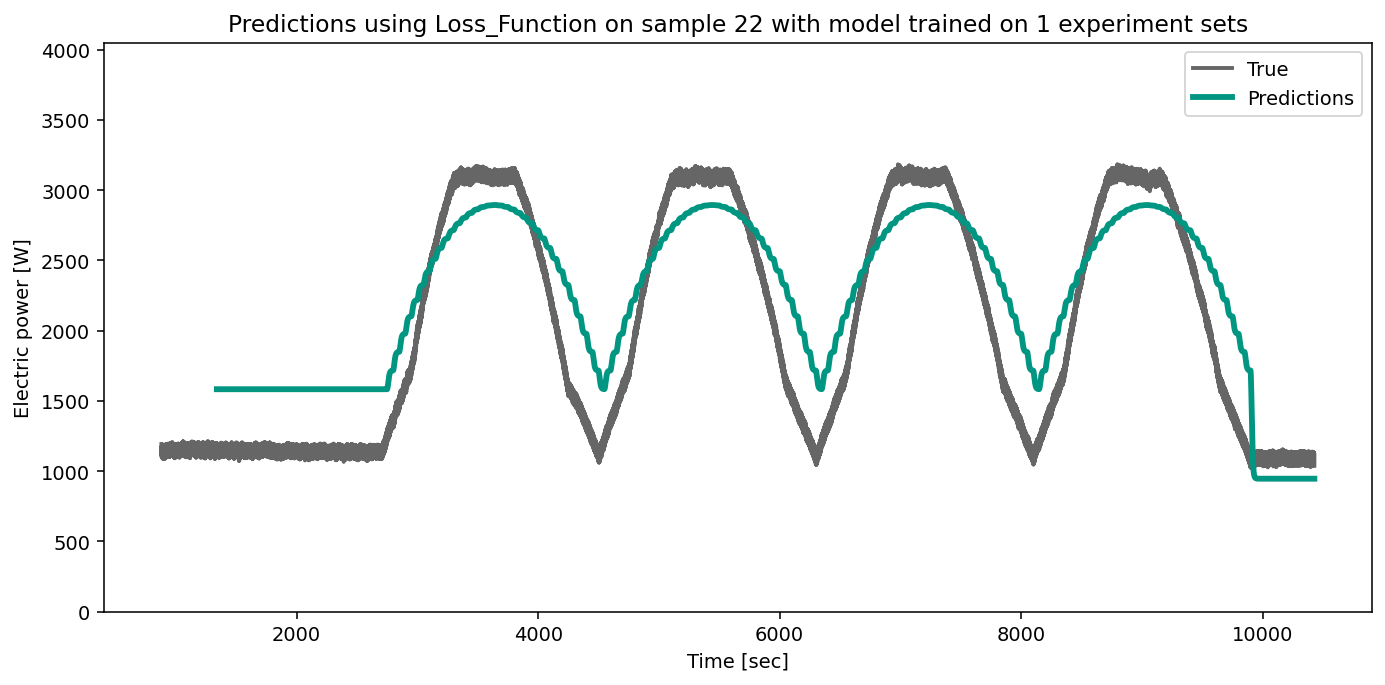

<Figure size 432x288 with 0 Axes>

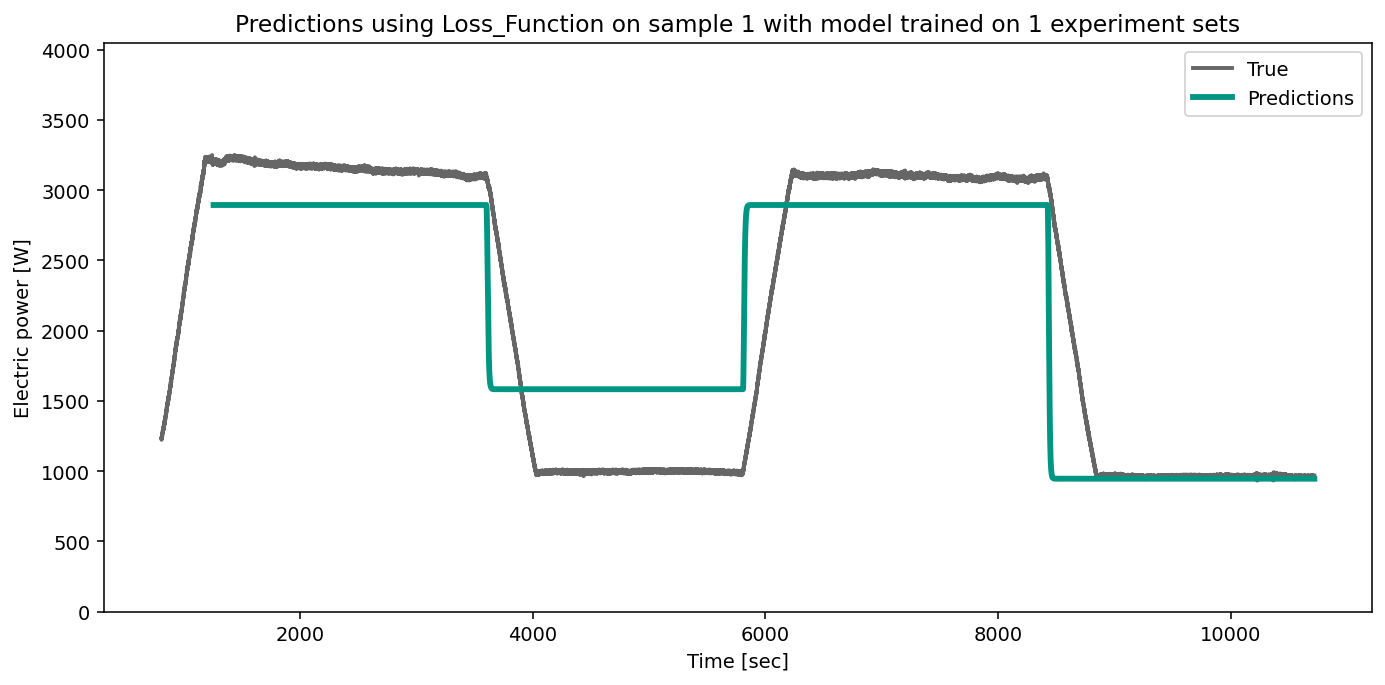

<Figure size 432x288 with 0 Axes>

In [7]:
model.predict(dataset=ds, show_plot=True)

## Print Result

In [8]:
model.get_result(print_result=True)

RMSE (over all train samples): 464.636 ±(0.0)
RMSE (over all test samples): 440.243 ±(58.356)
Best Epoch: 1
Training Time: 0:00:24.419996
